# CREDIT CARD FRAUD DETECTION

## Goal of this project is to make Credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

from sklearn.impute import SimpleImputer   # for handling missing values
from sklearn.model_selection import train_test_split  # for splitting the dataset into train and test
from sklearn.preprocessing import StandardScaler  # for standardization of data
from sklearn.metrics import mean_squared_error  # for MSE
from sklearn.metrics import classification_report  # for Classification report
from sklearn.metrics import precision_score  # for Precision score
from sklearn.metrics import accuracy_score  # for accuracy score
from sklearn.metrics import confusion_matrix  # for confusion matrix
from keras.models import Sequential  # For building the Neural Network layer by layer
from keras.layers import Dense  # To randomly initialize the weights to small numbers close to 0(But not 0)

### Loading the dataset

In [6]:
dataset = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [7]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
dataset.shape

(284807, 31)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking number of Frauds and Non-Frauds (Imbalance in the data)

In [11]:
print('Fraud Transacctions: {}'.format(len(dataset[dataset['Class'] == 1]))) 
print('Non Fraud Transactions: {}'.format(len(dataset[dataset['Class'] == 0])))

Fraud Transacctions: 492
Non Fraud Transactions: 284315


In [12]:
#Data Class Balance Check
print('Fraud Percentage: {}'.format(round((dataset['Class'].value_counts()[1]/len(dataset))*100,2)))
print('Non Fraud Percentage: {}'.format(round((dataset['Class'].value_counts()[0]/len(dataset))*100,2)))

Fraud Percentage: 0.17
Non Fraud Percentage: 99.83


### Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced.

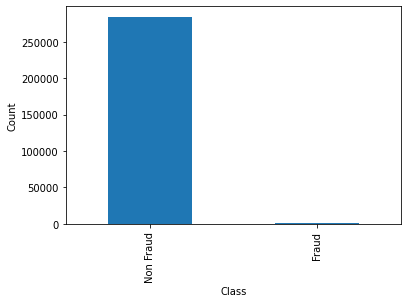

In [13]:
count= dataset['Class'].value_counts()
count.plot(kind='bar')
plt.xticks(range(2),['Non Fraud','Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Amount details for Fraudulent Transaction

In [14]:
fraud = dataset[dataset['Class'] == 1] 
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Amount details for Non Fraud Transaction

In [15]:
non_fraud = dataset[dataset['Class'] == 0] 
print("Amount details of the non fraudulent transaction")
non_fraud.Amount.describe() 

Amount details of the non fraudulent transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Scatter plot Fraud Vs Non-Fraud

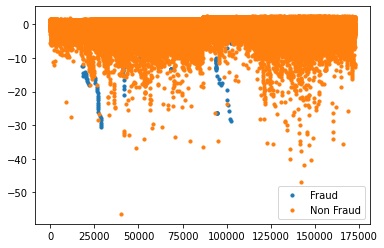

In [16]:
# plots
plt.scatter(fraud.iloc[:, 0], fraud.iloc[:, 1], s=10, label='Fraud')
plt.scatter(non_fraud.iloc[:, 0], non_fraud.iloc[:, 1], s=10, label='Non Fraud')
plt.legend()
plt.show()

### Splitting the dataset into Input(Features) and Output(Target)

### We have identified the input features and the target variable so we will separate them into two objects ‘x’ and ‘y’

In [17]:
x = dataset.drop(['Class'], axis = 1).values
y = dataset["Class"].values

In [18]:
print("Input Shape : ", x.shape)
print("Output Shape : ", y.shape)

Input Shape :  (284807, 30)
Output Shape :  (284807,)


### Data Preprocessing

### Handling Missing values

In [19]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(x[:, 1:30])
x[:, 1:30] = imputer.fit_transform(x[:, 1:30])

### Splitting into training and testing data

### Now we will split our dataset into train and test set using ‘train_test_split’ function

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)

In [23]:
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("xtest.shape  : ", xtest.shape)

xtrain.shape :  (213605, 30)
xtest.shape  :  (71202, 30)
ytrain.shape :  (213605,)
xtest.shape  :  (71202, 30)


### Feature Scaling

In [24]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

## Neural Network Model

In [26]:
# Initializing Neural Network Model
classifier = Sequential()

In [27]:
classifier.add(Dense(15, activation='relu',kernel_initializer='uniform',input_shape=(30,)))
classifier.add(Dense(15, activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform' ))

In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                465       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
import imblearn
from imblearn.under_sampling import NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(x, y)  # NearMiss() is an algorithm that helps in balancing the dataset

# Fitting the ANN to the Training set
classifier.fit(X_nearmiss,y_nearmiss, batch_size=10,epochs=50)

Epoch 1/50
99/99 [==============================] - 1s 1ms/step - loss: 2.5869 - accuracy: 0.5031
Epoch 2/50
99/99 [==============================] - 0s 1ms/step - loss: 0.7197 - accuracy: 0.5200
Epoch 3/50
99/99 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.5937
Epoch 4/50
99/99 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.5421
Epoch 5/50
99/99 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5893
Epoch 6/50
99/99 [==============================] - 0s 1ms/step - loss: 0.6422 - accuracy: 0.6582
Epoch 7/50
99/99 [==============================] - 0s 1ms/step - loss: 0.6030 - accuracy: 0.6930
Epoch 8/50
99/99 [==============================] - 0s 1ms/step - loss: 0.5488 - accuracy: 0.7485
Epoch 9/50
99/99 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.7061
Epoch 10/50
99/99 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7220
Epoch 11/50
99/99 [

In [31]:
# Predicting
y_pred_ann = classifier.predict(xtest)
y_pred_ann = (y_pred_ann > 0.5)
print("y_pred_Neural Network Model : \n", y_pred_ann)

y_pred_Neural Network Model : 
 [[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [False]]


In [32]:
#Confusion_matrix
cm_ann = confusion_matrix(ytest, y_pred_ann)
print("Confusion Matrix of Artificial Neural Network : \n\n", cm_ann)

Confusion Matrix of Artificial Neural Network : 

 [[59967 11115]
 [    7   113]]


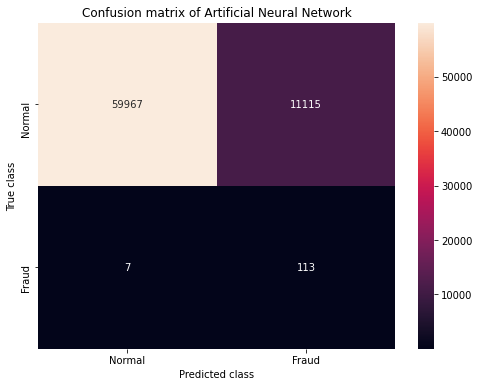

In [33]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud']  
plt.figure(figsize =(8, 6)) 
sns.heatmap(cm_ann, xticklabels = LABELS,yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix of Artificial Neural Network") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

### Results of Neural Network Model

In [34]:
# Validating the Prediction
# Accuracy = (TP + TN) / (TP + FP + TN + FN) 
Accuracy_random = ((cm_ann[0][0] + cm_ann[1][1]) / cm_ann.sum()) *100
print("Accuracy_NeuralNetwork    : ", Accuracy_random)

# Error Accuracy = (FP + FN) / (TP + FP + TN + FN) 
Error_rate_random = ((cm_ann[0][1] + cm_ann[1][0]) / cm_ann.sum()) *100
print("Error_rate_NeuralNetwork  : ", Error_rate_random)

# True Fake Recognition Rate
# Specificity = TN/(FP + TN)
Specificity_random = (cm_ann[1][1] / (cm_ann[1][1] + cm_ann[0][1])) *100
print("Specificity_NeuralNetwork : ", Specificity_random)

# True Genuine Recognition Rate
# Sensitivity = TP/(TP + FN) 
Sensitivity_random = (cm_ann[0][0] / (cm_ann[0][0] + cm_ann[1][0])) *100
print("Sensitivity_NeuralNetwork : ", Sensitivity_random)

Accuracy_NeuralNetwork    :  84.37965225695908
Error_rate_NeuralNetwork  :  15.620347743040927
Specificity_NeuralNetwork :  1.0064125400783754
Sensitivity_NeuralNetwork :  99.98832827558608


In [35]:
# Print the classification report
print(classification_report(ytest, y_pred_ann))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92     71082
           1       0.01      0.94      0.02       120

    accuracy                           0.84     71202
   macro avg       0.50      0.89      0.47     71202
weighted avg       1.00      0.84      0.91     71202



In [36]:
print('Precision Score: ',precision_score(ytest, y_pred_ann))

Precision Score:  0.010064125400783755


### Accuracy

In [38]:
accuracy_score(ytest, y_pred_ann)

0.8437965225695907